<a href="https://colab.research.google.com/github/alhnklc/Covid-19-Turkey-Data-Analysis/blob/master/TrCoronaVeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/Veri Bilimi")
!ls

ArabaAnalizi.ipynb	 Matplotlib.ipynb  PytonDeneme.xlsx
bisiklet_fiyatlari.xlsx  merc.xlsx	   Sınıflandırma.ipynb
bisiklet_modeli.h5	 model.png	   TensorFlow.ipynb
Corona_TR.xlsx		 Numpy.ipynb	   TrCoronaVeriAnalizi.ipynb
maliciousornot.xlsx	 PANDAS.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_excel("Corona_TR.xlsx")
data.head()

,Tarih,Toplam Test Sayısı,Toplam Hasta Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-09-28,10153223.0,315845,8062.0,65.0,1596.0,277052.0,1412.0,115523.0,65.0,1422.0
1,2020-09-27,10037700.0,314433,7997.0,65.0,1583.0,275630.0,1467.0,101119.0,68.0,1116.0
2,2020-09-26,9936581.0,312966,7929.0,66.0,1615.0,274514.0,1511.0,102009.0,71.0,1232.0
3,2020-09-25,9834572.0,311455,7858.0,66.0,1601.0,273282.0,1665.0,112885.0,73.0,1318.0
4,2020-09-24,9721687.0,309790,7785.0,66.0,1573.0,271964.0,1721.0,113317.0,74.0,1241.0


In [ ]:
#NaN olan verileri 0 yaptık
DataFrame = data.fillna(0)

In [ ]:
DataFrame.describe()

,Toplam Test Sayısı,Toplam Hasta Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
count,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,3.454578e+06,172095.875622,4331.009950,13.298507,301.064677,141686.671642,1547.572139,50076.696517,39.636816,1369.920398
std,2.864405e+06,90972.783629,2237.593489,27.374494,491.983476,93446.916304,1021.582168,31786.308863,31.774242,1132.669468
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.033617e+06,120204.000000,3174.000000,0.000000,0.000000,48886.000000,989.000000,33332.000000,18.000000,968.000000
50%,2.863632e+06,185245.000000,4905.000000,0.000000,0.000000,157516.000000,1304.000000,42320.000000,23.000000,1093.000000
75%,5.263816e+06,240804.000000,5844.000000,7.500000,596.000000,223759.000000,1703.000000,61716.000000,59.000000,1488.000000
max,1.015322e+07,315845.000000,8062.000000,94.000000,1615.000000,277052.000000,5138.000000,117113.000000,127.000000,5231.000000


In [ ]:
#Verileri Tarihe göre sıraladık en baştan mevcut güne kadar
DataFrame = DataFrame.sort_values(by="Tarih", ascending=True)

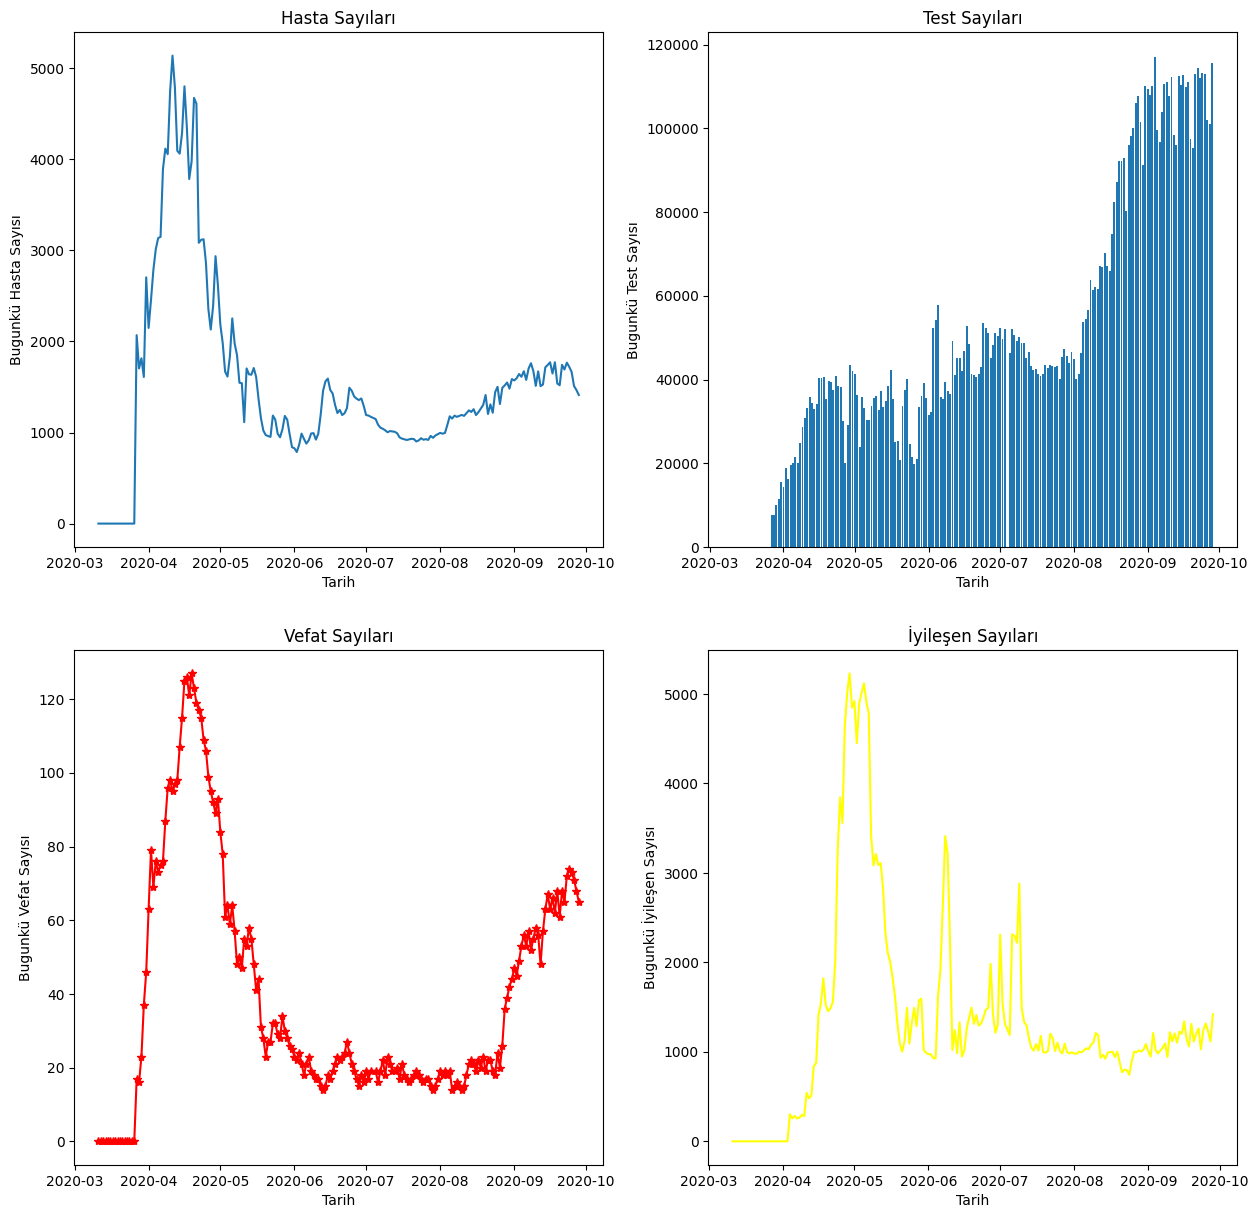

In [ ]:
plt.figure(figsize=(15,15), dpi=100)
plt.subplot(2,2,1)
plt.title("Hasta Sayıları")
plt.ylabel("Bugunkü Hasta Sayısı")
plt.xlabel("Tarih")
plt.plot(DataFrame["Tarih"],DataFrame["Bugünkü Hasta Sayısı"])

plt.subplot(2,2,2)
plt.ylabel("Bugunkü Test Sayısı")
plt.xlabel("Tarih")
plt.title("Test Sayıları")
plt.bar(DataFrame["Tarih"], DataFrame["Bugünkü Test Sayısı"])

plt.subplot(2,2,3)
plt.title("Vefat Sayıları")
plt.ylabel("Bugunkü Vefat Sayısı")
plt.xlabel("Tarih")
plt.plot(DataFrame["Tarih"],DataFrame["Bugünkü Vefat Sayısı"], "-*r")

plt.subplot(2,2,4)
plt.title("İyileşen Sayıları")
plt.ylabel("Bugunkü İyileşen Sayısı")
plt.xlabel("Tarih")
plt.plot(DataFrame["Tarih"],DataFrame["Bugünkü İyileşen Sayısı"], color="Yellow")

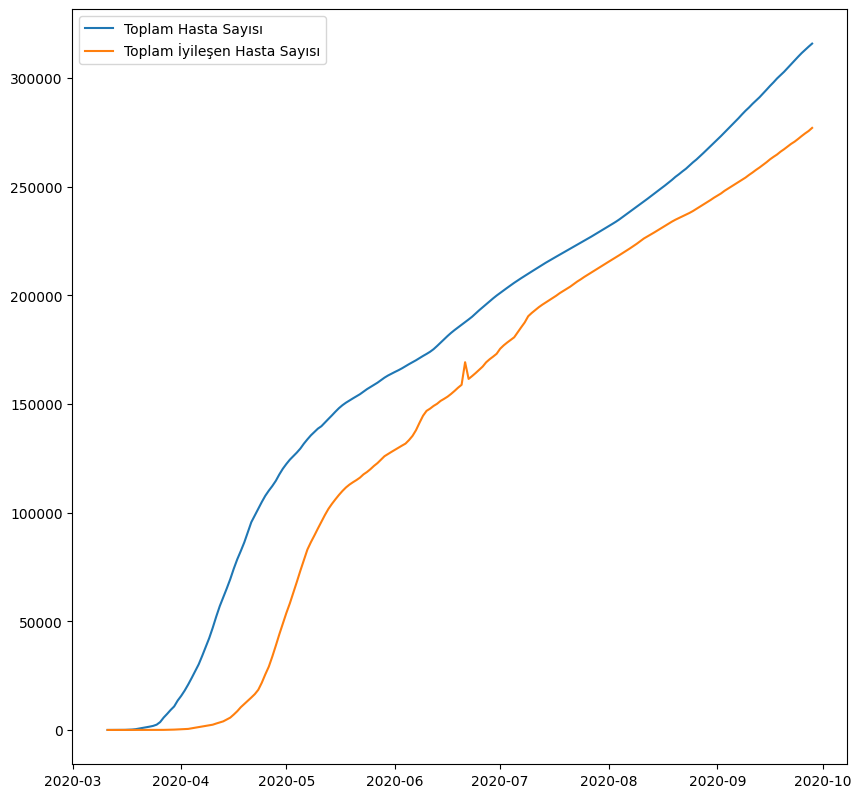

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.plot(DataFrame["Tarih"],DataFrame["Toplam Hasta Sayısı"])
plt.plot(DataFrame["Tarih"],DataFrame["Toplam İyileşen Hasta Sayısı"])
plt.legend(["Toplam Hasta Sayısı", "Toplam İyileşen Hasta Sayısı"])

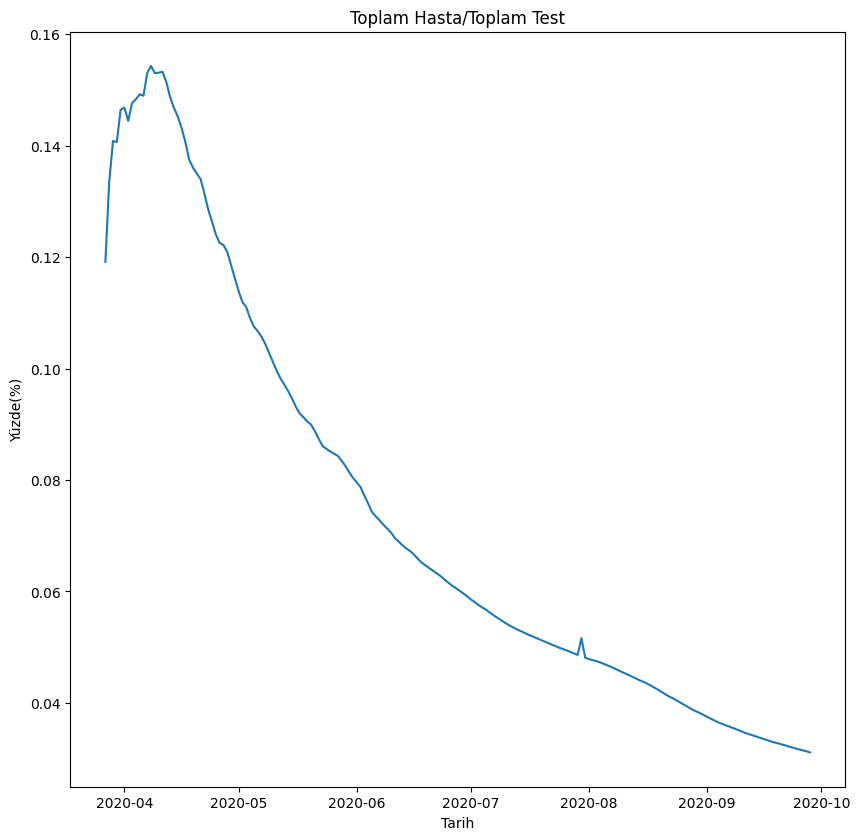

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.title("Toplam Hasta/Toplam Test")
plt.xlabel("Tarih")
plt.ylabel("Yüzde(%)")
plt.plot(DataFrame["Tarih"], (DataFrame["Toplam Hasta Sayısı"]/DataFrame["Toplam Test Sayısı"]))

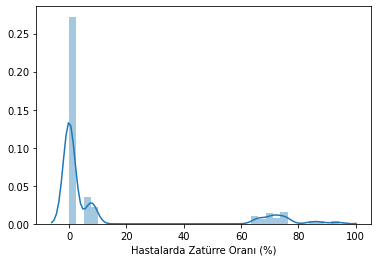

In [ ]:
sbn.distplot(DataFrame["Hastalarda Zatürre Oranı (%)"])

In [ ]:
#Bugünkü Hasta Sayısının kolerasyon analizi
DataFrame.corr()["Bugünkü Hasta Sayısı"]

Toplam Test Sayısı             -0.176124
Toplam Hasta Sayısı            -0.191115
Toplam Vefat Sayısı            -0.222992
Hastalarda Zatürre Oranı (%)   -0.033820
Ağır Hasta Sayısı              -0.035078
Toplam İyileşen Hasta Sayısı   -0.327501
Bugünkü Hasta Sayısı            1.000000
Bugünkü Test Sayısı             0.062420
Bugünkü Vefat Sayısı            0.881792
Bugünkü İyileşen Sayısı         0.162251
Name: Bugünkü Hasta Sayısı, dtype: float64

In [ ]:
#y değişkenine Bugünkü Hasta Sayısı verileri girdik çıkış olarak istediğimiz için
#x değişkenine ise Tarih ve Bugünkü Hasta Sayısı verilerini düşürüp geriye kalan verileri atadık
y = DataFrame["Bugünkü Hasta Sayısı"].values
x = DataFrame.drop(["Bugünkü Hasta Sayısı","Tarih"], axis= 1).values

In [ ]:
y.shape

(201,)

In [ ]:
x.shape

(201, 9)

In [ ]:
#x ve y değişkenlerini test ve train olarka 2'ye ayırdık
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
x_train.shape

(150, 9)

In [ ]:
x_test.shape

(51, 9)

In [ ]:
y_train.shape

(150,)

In [ ]:
y_test.shape

(51,)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#x değişkenlerini 0-1 arasında sayısıya dönüştürdük
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[0.2176238 , 0.53003698, 0.57429918, ..., 0.4630912 , 0.16535433,
        0.1770216 ],
       [0.62319778, 0.81764415, 0.75924088, ..., 0.68567964, 0.1496063 ,
        0.15197859],
       [0.13499142, 0.43900153, 0.46961052, ..., 0.30899217, 0.37007874,
        0.61384057],
       ...,
       [0.50609821, 0.75495814, 0.72103696, ..., 0.4843698 , 0.11811024,
        0.19652074],
       [0.52456594, 0.76618837, 0.72661871, ..., 0.53127321, 0.11023622,
        0.23150449],
       [0.        , 0.00211813, 0.00111635, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
#Modelimizi Oluşturduk
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(x=x_train, y=y_train, epochs=150, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/150
15/15 [==============================] - 0s 8ms/step - loss: 3518120.0000 - val_loss: 3187417.0000
Epoch 2/150
15/15 [==============================] - 0s 2ms/step - loss: 3517503.2500 - val_loss: 3186949.7500
Epoch 3/150
15/15 [==============================] - 0s 2ms/step - loss: 3517096.5000 - val_loss: 3186661.7500
Epoch 4/150
15/15 [==============================] - 0s 3ms/step - loss: 3516847.0000 - val_loss: 3186452.7500
Epoch 5/150
15/15 [==============================] - 0s 2ms/step - loss: 3516632.0000 - val_loss: 3186247.7500
Epoch 6/150
15/15 [==============================] - 0s 2ms/step - loss: 3516406.0000 - val_loss: 3186001.2500
Epoch 7/150
15/15 [==============================] - 0s 2ms/step - loss: 3516104.0000 - val_loss: 3185669.2500
Epoch 8/150
15/15 [==============================] - 0s 2ms/step - loss: 3515643.2500 - val_loss: 3185082.7500
Epoch 9/150
15/15 [==============================] - 0s 2ms/step - loss: 3514812.2500 - val_loss: 3184000.7500
E

In [ ]:
kayıp = pd.DataFrame(model.history.history)

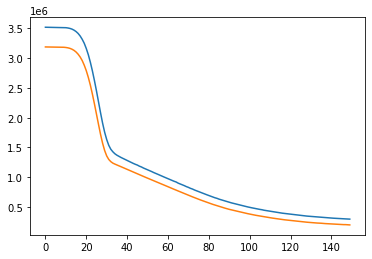

In [ ]:
plt.plot(kayıp)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Modelimize tahmin yaptırdık
predict = model.predict(x_test)

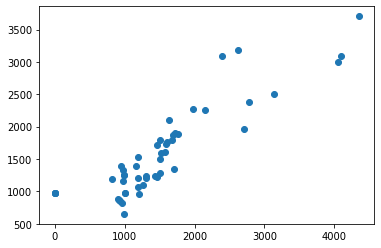

In [ ]:
plt.scatter(y_test, predict)

In [ ]:
#y_Test ve predict arasındaki mutlak ortalama hataya baktık
mean_absolute_error(y_test, predict)

332.48308249080884

In [ ]:

predict = pd.Series(predict.reshape(51,))


In [ ]:
predictDF = pd.DataFrame(y_test, columns=["Gerçek Vakalar"])
predictDF

,Gerçek Vakalar
0,1692.0
1,983.0
2,1263.0
3,1587.0
4,827.0
5,1509.0
6,0.0
7,1429.0
8,4093.0
9,1195.0


In [ ]:
#Test verisindeki vaka sayılar ve tahminni vaka sayılarını dataframe'e dönüştürdük ve aynı tabloda gösterdik
predictDF = pd.concat([predictDF, predict], axis=1)
predictDF

,Gerçek Vakalar,0
0,1692.0,1865.576538
1,983.0,1333.798706
2,1263.0,1105.818726
3,1587.0,1731.825317
4,827.0,1184.840576
5,1509.0,1493.634399
6,0.0,975.171204
7,1429.0,1238.639404
8,4093.0,3092.765869
9,1195.0,1069.311035


In [ ]:
#Tahmin DataFramenin Sutun isimlerini belirledik
predictDF.columns=["Gerçek Vakalar", "Tahmini Vakalar"]
predictDF

,Gerçek Vakalar,Tahmini Vakalar
0,1692.0,1865.576538
1,983.0,1333.798706
2,1263.0,1105.818726
3,1587.0,1731.825317
4,827.0,1184.840576
5,1509.0,1493.634399
6,0.0,975.171204
7,1429.0,1238.639404
8,4093.0,3092.765869
9,1195.0,1069.311035
